## Week 2 Homework: Prediction of Bitcoin with use of 4 different Logistinc Regression models and Yahoo data + 2 extra values (moving average and ret. deviation) as features/ independent variables

In [1]:
import pandas as pd
btc = pd.read_csv('BTCEUR.csv', encoding='utf-8')

In [2]:
btc.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-09,365.209991,368.239990,360.130005,366.010010,366.010010,419183
1,2014-09-10,366.010010,377.989990,363.350006,368.350006,368.350006,533768
2,2014-09-11,368.350006,372.260010,364.640015,369.290009,369.290009,283011
3,2014-09-12,369.290009,369.450012,362.529999,367.489990,367.489990,230262
4,2014-09-13,367.489990,369.230011,363.100006,365.850006,365.850006,167439
5,2014-09-14,365.850006,370.019989,363.559998,364.670013,364.670013,184888
6,2014-09-15,364.670013,369.720001,361.109985,363.429993,363.429993,376934
7,2014-09-16,363.429993,368.049988,357.579987,359.559998,359.559998,364121
8,2014-09-17,359.559998,361.350006,346.480011,353.980011,353.980011,476343
9,2014-09-18,353.980011,353.420013,319.200012,331.250000,331.250000,973288


In [3]:
btc['MA'] = btc['Adj Close'].rolling(window=100).mean()

In [4]:
btc['ret_dev'] = btc['Adj Close']/ btc['Adj Close'].shift(1) - 1

In [5]:
# Convert Date column to datetime
btc.loc[:, 'Date'] = pd.to_datetime(btc['Date'],format='%Y-%m-%d')

In [6]:
# Change all column headings to be lower case, and remove spacing
btc.columns = [str(x).lower().replace(' ', '_') for x in btc.columns]


In [7]:
# Get month of each sample
btc['month'] = btc['date'].dt.month

In [8]:
# Sort by datetime
btc.sort_values(by='date', inplace=True, ascending=True)

In [54]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

In [10]:
btc.head(5)

,date,open,high,low,close,adj_close,volume,ma,ret_dev,month
0,2014-09-09,365.209991,368.239990,360.130005,366.010010,366.010010,419183,NaN,NaN,9
1,2014-09-10,366.010010,377.989990,363.350006,368.350006,368.350006,533768,NaN,0.006393,9
2,2014-09-11,368.350006,372.260010,364.640015,369.290009,369.290009,283011,NaN,0.002552,9
3,2014-09-12,369.290009,369.450012,362.529999,367.489990,367.489990,230262,NaN,-0.004874,9
4,2014-09-13,367.489990,369.230011,363.100006,365.850006,365.850006,167439,NaN,-0.004463,9


In [11]:
df1 = btc.pop('adj_close')

In [12]:
btc['price']=df1

In [13]:
btc = btc.dropna()

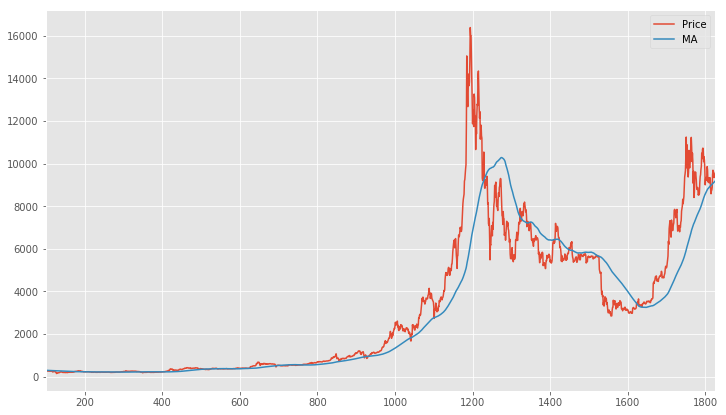

In [14]:
style.use('ggplot')
mpl.rc('figure', figsize=(12,7))
mpl.__version__

btc.price.plot(label='Price')
btc.ma.plot(label='MA')
plt.legend()

In [15]:
btc.shape

(1728, 10)

In [16]:
rows = btc.shape[0]

In [17]:
rows

1728

In [18]:
features = btc.shape[1]

In [19]:
btc.set_index("date", inplace=True)


In [27]:
import numpy as np

In [28]:
features

10

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, LassoLars
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [55]:
def model_performance (model_pred):
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(3))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(3))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(3))
  


In [61]:
def model_plot (model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.plot(y_test, y_test, color='red', linewidth=2)


In [62]:
window_size=32
num_samples=len(btc)-window_size

# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)


data = btc['price'].values[indices] # Create the 2D matrix of training samples
x = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [63]:
from sklearn.model_selection import train_test_split
split_ratio=0.75
data_split=int(split_ratio*num_samples)

In [64]:
x_train = x[:data_split]
y_train = y[:data_split]
x_test = x[data_split:]
y_test = y[data_split:]

In [65]:
lr=LinearRegression()

lr.fit(x_train, y_train)

y_pred_lr=lr.predict(x_test)

In [66]:
model_performance(y_pred_lr)

Mean Absolute Error: 177.12
Mean Squared Error: 78361.122
Root Mean Squared Error: 279.931


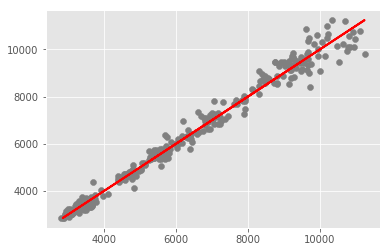

In [67]:
model_plot(y_pred_lr)

In [69]:
reg_ridge = Ridge()
reg_ridge.fit(x_train, y_train)
y_pred_ridge=reg_ridge.predict(x_test)

In [70]:
model_performance(y_pred_ridge)

Mean Absolute Error: 177.12
Mean Squared Error: 78361.122
Root Mean Squared Error: 279.931


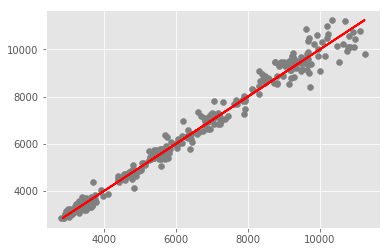

In [71]:
model_plot(y_pred_ridge)

In [72]:
reg_lasso = Lasso()
reg_lasso.fit(x_train, y_train)
y_pred_lasso=reg_lasso.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [73]:
model_performance(y_pred_lasso)

Mean Absolute Error: 176.894
Mean Squared Error: 79662.507
Root Mean Squared Error: 282.245


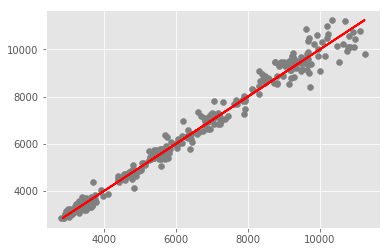

In [74]:
model_plot(y_pred_ridge)

In [75]:
reg_elastic = ElasticNet()
reg_elastic.fit(x_train, y_train)
y_pred_elastic=reg_elastic.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [76]:
model_performance(y_pred_elastic)

Mean Absolute Error: 176.896
Mean Squared Error: 79663.223
Root Mean Squared Error: 282.247


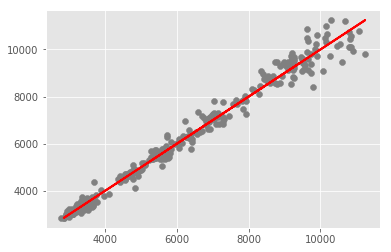

In [77]:
model_plot(y_pred_elastic)

In [78]:
reg_bey = BayesianRidge()
reg_bey.fit(x_train, y_train)
y_pred_bey=reg_bey.predict(x_test)

In [79]:
model_performance(y_pred_bey)

Mean Absolute Error: 176.246
Mean Squared Error: 77932.493
Root Mean Squared Error: 279.164


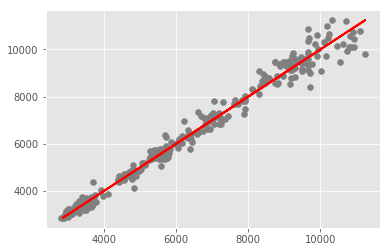

In [80]:
model_plot(y_pred_bey)

In [81]:
reg_lars = LassoLars()
reg_lars.fit(x_train, y_train)
y_pred_lars=reg_lars.predict(x_test)

In [82]:
model_performance(y_pred_lars)

Mean Absolute Error: 162.09
Mean Squared Error: 68176.377
Root Mean Squared Error: 261.106


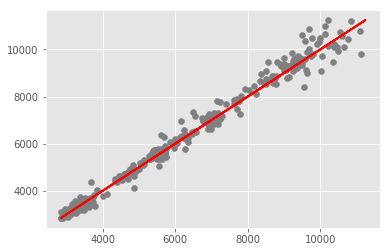

In [83]:
model_plot(y_pred_lars)

In [84]:
pred_results=pd.DataFrame({"lasso":np.absolute(y_test-y_pred_lasso), 
              "lr":np.absolute(y_test-y_pred_lr), 
              "ridge":np.absolute(y_test-y_pred_ridge),
              "lars":np.absolute(y_test-y_pred_lars)})


In [90]:
pred_results.describe()

,lasso,lr,ridge,lars
count,424.000000,424.000000,424.000000,424.000000
mean,176.894380,177.119640,177.119639,162.089889
std,220.193635,217.027285,217.027285,204.944644
min,0.255021,0.388063,0.388063,0.181857
25%,35.216794,36.432357,36.432357,33.137669
50%,95.687262,96.678012,96.678009,87.774425
75%,226.909430,233.607329,233.607336,207.618258
max,1444.304026,1461.769505,1461.769490,1313.427698


In [85]:
pred_results.head(5)

,lasso,lr,ridge,lars
0,8.509874,51.543106,51.543101,13.958031
1,50.489550,45.867737,45.867742,67.298828
2,173.583931,177.034093,177.034091,120.728963
3,326.307778,317.162443,317.162447,341.961070
4,544.212159,531.839233,531.839241,564.280344


In [86]:
result_stats = pred_results.describe()

In [87]:
result_stats

,lasso,lr,ridge,lars
count,424.000000,424.000000,424.000000,424.000000
mean,176.894380,177.119640,177.119639,162.089889
std,220.193635,217.027285,217.027285,204.944644
min,0.255021,0.388063,0.388063,0.181857
25%,35.216794,36.432357,36.432357,33.137669
50%,95.687262,96.678012,96.678009,87.774425
75%,226.909430,233.607329,233.607336,207.618258
max,1444.304026,1461.769505,1461.769490,1313.427698


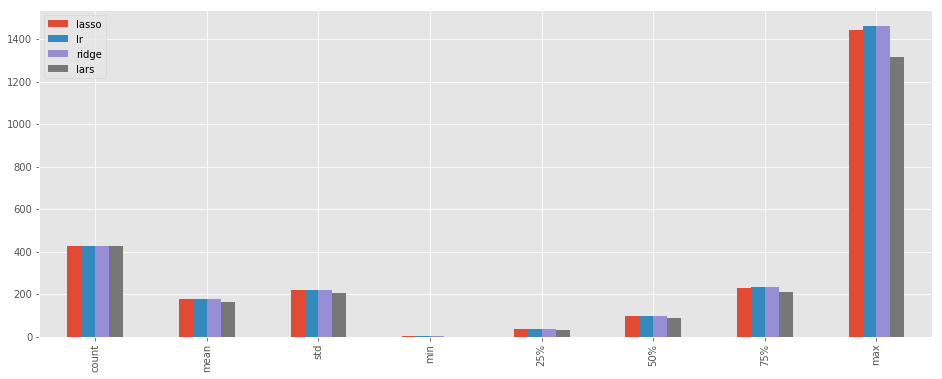

In [88]:
result_stats.plot.bar(figsize=(16, 6))

### The lower the result the better.  The results of linear regressin are roughtly the same. its bet to focus on mean score therfore LassoLars / Lars Regression socred best /lowest at predicting the price of Bitcoin